# Basic sound fourier analysis

Sound spectral analysis in one shot

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import wave
import struct
from scipy.io.wavfile import read,write
from IPython.display import Audio
%matplotlib inline

In [3]:
# Fourier
from scipy.fftpack import fft

### Harmonics

The harmonic of amplitude A, angular frequency w, and initial phase phi can be written as the following equation:
    
\begin{equation*}
y = A sin (\omega x + \phi )
\end{equation*}

Where the period T is equal to \begin{equation*}T = \frac{2\pi} {\omega} \end{equation*}

and the frequency \begin{equation*}f = \frac{1}{T} = \frac{\omega}{2\pi} \end{equation*}


Even though it is a sum of various harmonics, a trigonometric polynomial in general represents a function of a much more complicated nature than a simple harmonic. By suitably choosing the constants A, a1, b1, a2, b2, ... we can form functions with graphs quite unlike the smooth and symmetric graph of a simple harmonic.

\begin{equation*}
\phi (t) = f\left(\frac{tl} {\pi}\right) = A + \sum_{k=1}^\infty \left(a_k cos (kt) + b_k sin (kt)\right)
\end{equation*}

### Fourier transform

\begin{equation*}
f(t) = \frac{1}{2} a_0 + \sum_{k=1}^\infty \left(a_k cos (2\pi kt) + b_k sin (2\pi kt)\right)
\end{equation*}

https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/fftpack.html, https://docs.scipy.org/doc/numpy/reference/routines.fft.html

The FFT y[k] of length N of the length-N sequence x[n] is defined as:

\begin{equation*}
y[k] = \sum_{n=0}^{N-1} e^{-2 \pi j kn/N} x[n]
\end{equation*}

and the inverse transform is defined as follows:

\begin{equation*}
x[n] = \frac{1}{N} \sum_{n=0}^{N-1} e^{-2 \pi j kn/N} y[k]
\end{equation*}

From the definition of the FFT it can be seen that the DC component:

\begin{equation*}
y[0] = \sum_{n=0}^{N-1} x[n]
\end{equation*}

For N even, the elements y[1]...y[N/2-1] contain the positive-frequency terms, and the elements y[N/2]...y[N-1] contain the negative-frequency terms, in order of decreasingly negative frequency. For N odd, the elements y[1]...y[(N-1)/2] contain the positive- frequency terms, and the elements y[(N+1)/2]...y[N-1] contain the negative- frequency terms, in order of decreasingly negative frequency.

In case the sequence x is real-valued, the values of y[n] for positive frequencies is the conjugate of the values y[n] for negative frequencies (because the spectrum is symmetric). Typically, only the FFT corresponding to positive frequencies is plotted.

### Let's create a signal as a combination of simple harmonics and find its Fourier transform

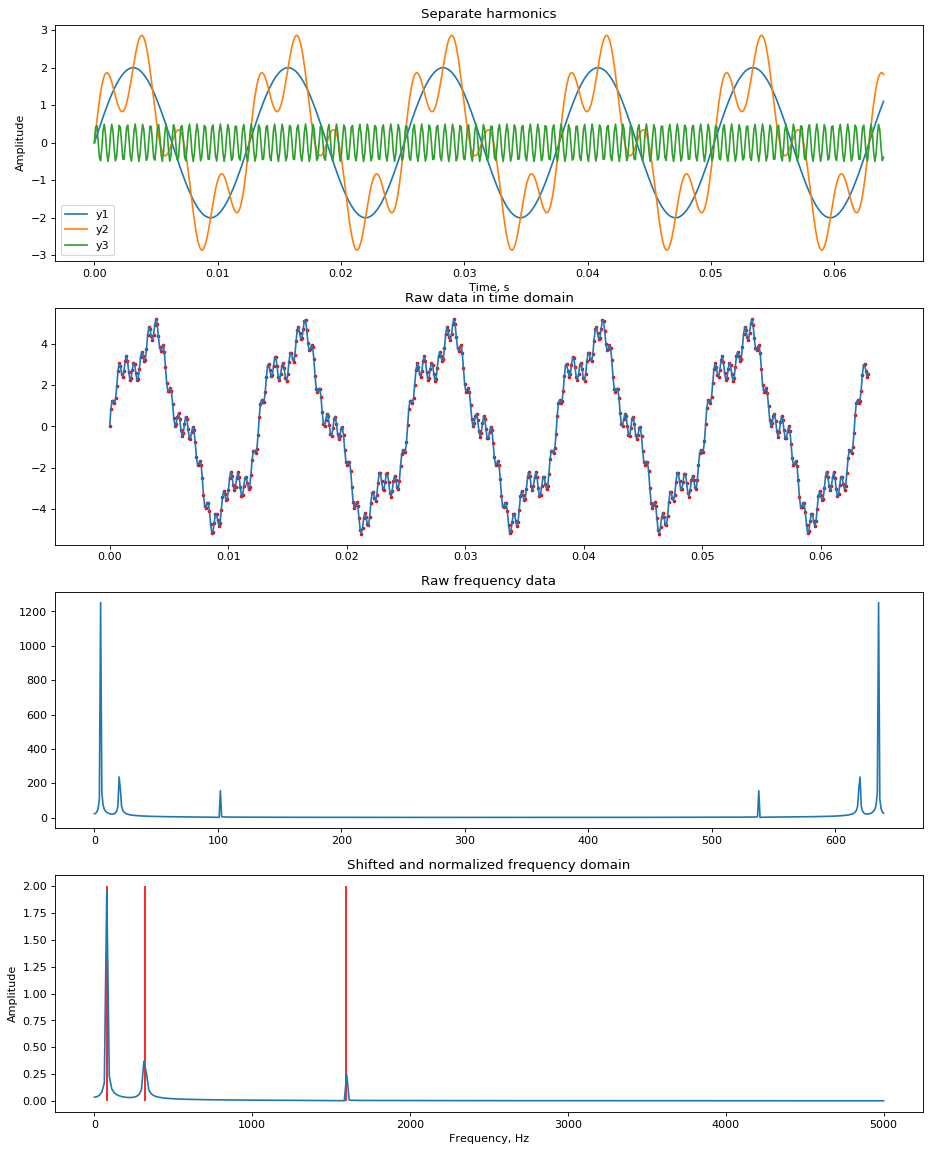

According to equation above, let's check the frequencies:

Period T1 = 0.012566370614359173 s
Frequency f1 = 79.57747154594766 Hz


Period T2 = 0.0031415926535897933 s
Frequency f2 = 318.30988618379064 Hz


Period T3 = 0.0006283185307179586 s
Frequency f3 = 1591.5494309189535 Hz


In [15]:
# number of sample points
N = 640
# sample spacing
T = 0.1*1e-3
x = np.linspace(0.0, N*T, N)
y1 = 2*np.sin(x*500)
y2 = 1*np.sin(x*2000)+y1
y3 = 0.5*np.sin(x*10000)
yf = fft(y1+y2+y3)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

period1 = 2*np.pi/500
freq1 = 1/period1
period2 = 2*np.pi/2000
freq2 = 1/period2
period3 = 2*np.pi/10000
freq3 = 1/period3

fig = plt.figure(figsize=(14,18), dpi=80)
plt.subplot(411)
plt.plot(x,y1,label='y1')
plt.plot(x,y2,label='y2')
plt.plot(x,y3,label='y3')
plt.legend()
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Separate harmonics')

plt.subplot(412)
plt.scatter(x,y1+y2+y3,s=5,c='r')
plt.plot(x,y1+y2+y3)
plt.title('Raw data in time domain')

plt.subplot(413)
plt.plot(np.abs(yf))
plt.title('Raw frequency data')

plt.subplot(414)
plt.plot(xf, 1.0/N * np.abs(yf[0:N//2]))
plt.title('Shifted and normalized frequency domain')
plt.vlines(freq1,0,2,'r')
plt.vlines(freq2,0,2,'r')
plt.vlines(freq3,0,2,'r')
plt.xlabel('Frequency, Hz')
plt.ylabel('Amplitude')

plt.show()

# According to equation above, let's check the frequencies
print("According to equation above, let's check the frequencies:\n")

print('Period T1 = {} s'.format(period1))
print('Frequency f1 = {} Hz'.format(freq1))
print('\n\nPeriod T2 = {} s'.format(period2))
print('Frequency f2 = {} Hz'.format(freq2))
print('\n\nPeriod T3 = {} s'.format(period3))
print('Frequency f3 = {} Hz'.format(freq3))

### Now let's create our own sound based on developed signal

In-depth explanaition available here: https://www.pythonforengineers.com/audio-and-digital-signal-processingdsp-in-python/

In [43]:
# frequency is the number of times a wave repeats a second
frequency = 1000
num_samples = 48000
# The sampling rate of the analog to digital convert
sampling_rate = 48000.0
amplitude = 1600 #loudness of sound
file = "test.wav"

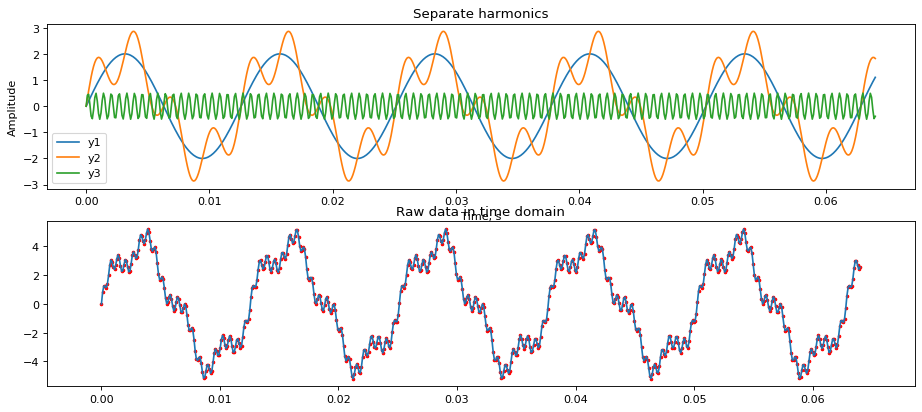

In [85]:
# number of sample points
N = 640
# sample spacing
T = 0.1*1e-3
x = np.linspace(0.0, N*T, N)
y1 = 2*np.sin(x*500)
y2 = 1*np.sin(x*2000)+y1
y3 = 0.5*np.sin(x*10000)

fig = plt.figure(figsize=(14,6), dpi=80)
plt.subplot(211)
plt.plot(x,y1,label='y1')
plt.plot(x,y2,label='y2')
plt.plot(x,y3,label='y3')
plt.legend()
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Separate harmonics')

plt.subplot(212)
plt.scatter(x,y1+y2+y3,s=5,c='r')
plt.plot(x,y1+y2+y3)
plt.title('Raw data in time domain')

plt.show()

In [68]:
# y(t) = A * sin(2 * pi * f * t) - sine wave
#sine_wave = [np.sin(2 * np.pi * frequency * x/sampling_rate) for x in range(num_samples)]

sine_wave = [(2*np.sin(500*x*frequency/sampling_rate)+\
              np.sin(2000*x*frequency/sampling_rate)+\
              2*np.sin(500*x*frequency/sampling_rate)+\
             0.5*np.sin(10000*x*frequency/sampling_rate)) for x in range(num_samples)]

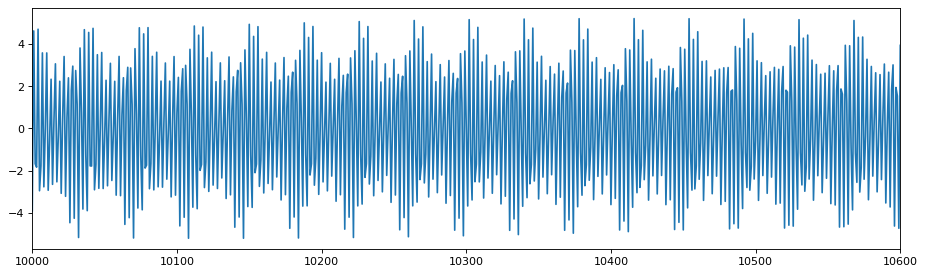

In [97]:
plt.figure(figsize=(14,4), dpi=80)
plt.plot(sine_wave)
plt.xlim(10000,10600)
plt.show()

In [72]:
nframes=num_samples
comptype="NONE"
compname="not compressed"
nchannels=1
sampwidth=2

In [73]:
wav_file=wave.open(file, 'w')
wav_file.setparams((nchannels, sampwidth, int(sampling_rate), nframes, comptype, compname))

In [74]:
for s in sine_wave:
    wav_file.writeframes(struct.pack('h', int(s*amplitude)))

In [77]:
Fs,data=read(file)
print(data.shape)
print("Sampling frequency = ",Fs)

(48000,)
Sampling frequency =  48000


In [78]:
Audio(data,rate=Fs)

In [79]:
frame_rate = 48000.0
infile = file
num_samples = 48000
wav_file = wave.open(infile, 'r')
data = wav_file.readframes(num_samples)
wav_file.close()

In [80]:
data = struct.unpack('{n}h'.format(n=num_samples), data)

In [82]:
data = np.array(data)

In [86]:
data_fft = np.fft.fft(data)

In [87]:
# This will give us the frequency we want
frequencies = np.abs(data_fft)

In [88]:
print("The frequency is {} Hz".format(np.argmax(frequencies)))

The frequency is 31577 Hz


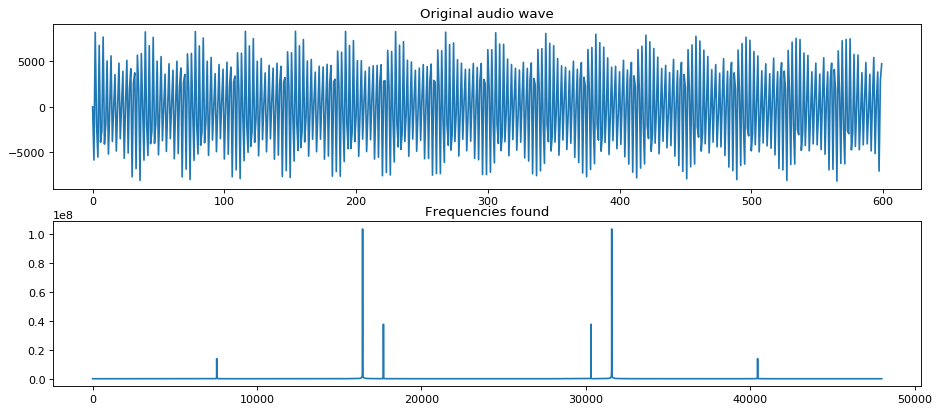

In [98]:
plt.figure(figsize=(14,6), dpi=80)
plt.subplot(2,1,1)
plt.plot(data[:600])
plt.title("Original audio wave")
plt.subplot(2,1,2)
plt.plot(frequencies)
plt.title("Frequencies found")
#plt.xlim(0,1200)
plt.show()

In [99]:
yf = fft(data)
xf = np.linspace(0.0, 1.0/(2.0*(1/num_samples)), num_samples//2)

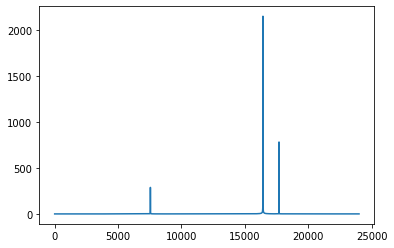

In [101]:
plt.plot(xf,1.0/num_samples*np.abs(yf[0:num_samples//2]))

### Add some high- and low-frequency noise

### Filter the noise

### Example with a violin sound

In [102]:
Fs,data=read("violin.wav")
print(data.shape)
print("Sampling frequency = ",Fs)

(220500,)
Sampling frequency =  44100


In [103]:
Audio(data,rate=Fs)

In [106]:
data_fft = np.fft.fft(data)
frequencies = np.abs(data_fft)

/home/aloy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  if sys.path[0] == '':


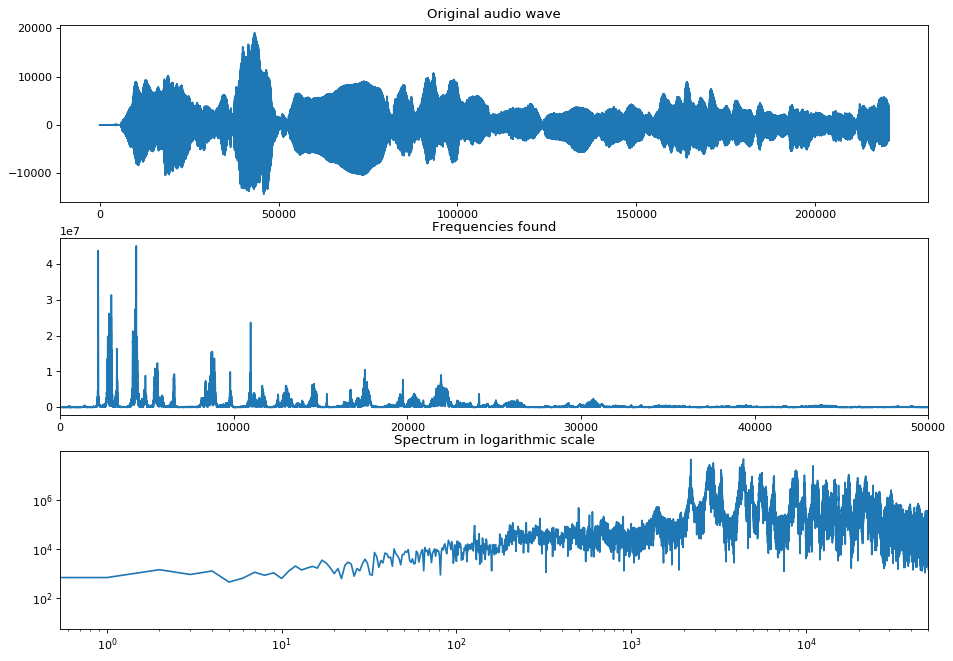

In [110]:
plt.figure(figsize=(14,10), dpi=80)
plt.subplot(311)
plt.plot(data)
plt.title("Original audio wave")
plt.subplot(312)
plt.plot(frequencies)
plt.xlim(0,0.5*1e+5)
plt.title("Frequencies found")

plt.subplot(313)
plt.loglog(frequencies)
plt.xlim(0,0.5*1e+5)
plt.title("Spectrum in logarithmic scale")
plt.show()

### Low number of samples

A good video explanaition available here: https://www.youtube.com/watch?v=R6u5BFOJDh0

#### Even number of samples

Number of samples = (8,)


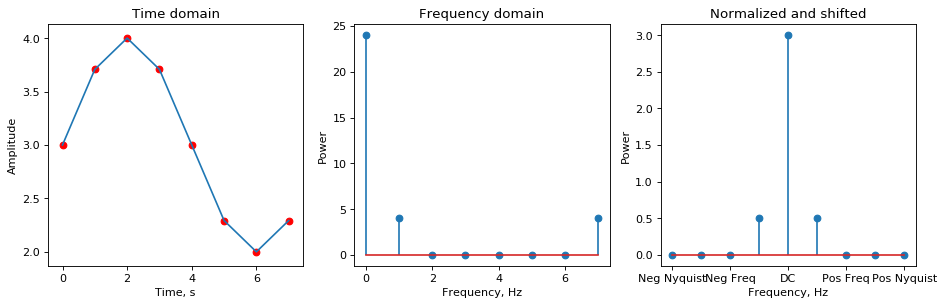

In [33]:
signal_span = np.r_[0:2*np.pi:np.pi/4]

DC = 3
sampling_rate = 8
signal_in = np.sin(signal_span)+DC

# sampling rate = 8 = len(signal_in)
print("Number of samples = {}".format(np.shape(signal_in)))

fig = plt.figure(figsize=(14,4), dpi=80)
plt.subplot(131)
plt.plot(signal_in)
for i in range(len(signal_in)):
    plt.scatter(i,signal_in[i],c='r')
plt.title('Time domain')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')

plt.subplot(132)
signal_fft = np.fft.fft(signal_in)
signal_fft_power = np.abs(signal_fft)
plt.stem(signal_fft_power,use_line_collection=True)
plt.title('Frequency domain')
plt.xlabel('Frequency, Hz')
plt.ylabel('Power')

plt.subplot(133)
DC_value = signal_fft_power[0]/sampling_rate
plt.stem(np.hstack((signal_fft_power[4:8]/8,DC_value,signal_fft_power[1:5]/8)),use_line_collection=True)
plt.xticks([0,2,4,6,8],['Neg Nyquist','Neg Freq','DC','Pos Freq','Pos Nyquist'])
plt.title('Normalized and shifted')
plt.xlabel('Frequency, Hz')
plt.ylabel('Power')

plt.show()

#### Odd number of samples

Number of samples = (7,)


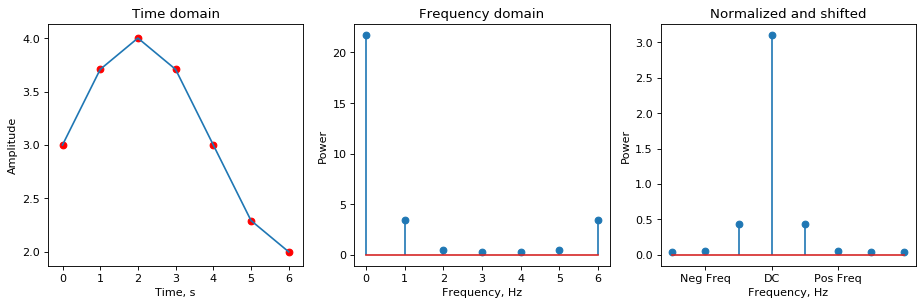

In [41]:
signal_span = np.r_[0:2*np.pi:np.pi/4][0:-1]

DC = 3
sampling_rate = 7
signal_in = np.sin(signal_span)+DC

# sampling rate = 8 = len(signal_in)
print("Number of samples = {}".format(np.shape(signal_in)))

fig = plt.figure(figsize=(14,4), dpi=80)
plt.subplot(131)
plt.plot(signal_in)
for i in range(len(signal_in)):
    plt.scatter(i,signal_in[i],c='r')
plt.title('Time domain')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')

plt.subplot(132)
signal_fft = np.fft.fft(signal_in)
signal_fft_power = np.abs(signal_fft)
plt.stem(signal_fft_power,use_line_collection=True)
plt.title('Frequency domain')
plt.xlabel('Frequency, Hz')
plt.ylabel('Power')

plt.subplot(133)
DC_value = signal_fft_power[0]/sampling_rate
plt.stem(np.hstack((signal_fft_power[4:8]/8,DC_value,signal_fft_power[1:5]/8)),use_line_collection=True)
plt.xticks([1,3,5],['Neg Freq','DC','Pos Freq'])
plt.title('Normalized and shifted')
plt.xlabel('Frequency, Hz')
plt.ylabel('Power')

plt.show()

# References

[1] <i>Georgy Tolstov.</i> <b>Fourier Series.</b> Dover Publications, Inc. New York, 2017. ISBN-13: 978-0-486-63317-6

[2] <i>Allen B. Downey.</i> <b>Think DSP: Digital Signal Processing in Python.</b> Green Tea Press, Needham, MA, USA, 2014. 
http://greenteapress.com/thinkdsp/thinkdsp.pdf, https://github.com/AllenDowney/ThinkDSP

[3] Fourier Transforms (scipy.fftpack) https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/fftpack.html#id8

[4] Discrete Fourier Transform (numpy.fft) https://docs.scipy.org/doc/numpy/reference/routines.fft.html

[5] Python For Engineers: Audio and Digital Signal Processing(DSP) in Python. https://www.pythonforengineers.com/audio-and-digital-signal-processingdsp-in-python/

[6] Discrete Fourier Transform - Simple Step by Step. https://www.youtube.com/watch?v=mkGsMWi_j4Q

[7] Intuitive Understanding of the Fourier Transform and FFTs. https://www.youtube.com/watch?v=FjmwwDHT98c